<a id="1"></a>
<div style="font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #1976D2; font-size: 180%; text-align: center; padding: 10px; background: #BBDEFB; border-bottom: 8px solid #0D47A1;">
    📊 Welcome to the My Notebook! 📈✨
</div>

In [1]:
pip install --progress-bar off --upgrade --quiet pycaret[full]

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [34 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-fpkn6gen/pyyaml_27c2176368dd487a8e086e8ad82666c8/setup.py", line 291, in <module>
          setup(
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/core.py", line 185, in setup
          return run_commands(dist)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/core.py", line 201, in run_commands
          dist.run_commands()
        File "/opt/conda/lib/python3.10/site-packages/setuptools/_distutils/dist.py", line 969, in run_commands
          self.run_command(cmd)
        File "/opt/conda/lib/python3.10/site-packages/setuptools/dist.py", line 963, in run_command
          super().run_command(command)
        File "/op

In [2]:
!pip install --quiet pycaret

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.1.2 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.1 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
xarray 2024.2.0 requires packaging>=22, but you have packaging 21.3 which is incompatible.
ydata-profiling 4.6.4 requires numpy<1.26,>=1.16.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import json

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from pycaret.regression import *
import ast
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns

<a id="3"></a>
<div style="font-family: 'Courier New', Courier, monospace; font-weight: bold; letter-spacing: 1px; color: #1976D2; font-size: 140%; text-align: left; padding: 10px; background: #BBDEFB; border-bottom: 8px solid #0D47A1;">
    Assessing Data ....
</div>

In [4]:
data = pd.read_csv("Housing.csv")
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB



<a id="3"></a>
<div style="font-family: 'Courier New', Courier, monospace; font-weight: bold; letter-spacing: 1px; color: #1976D2; font-size: 140%; text-align: left; padding: 10px; background: #BBDEFB; border-bottom: 8px solid #0D47A1;">
    <h2 style="text-align: left; font-size: 28px; color: #0F3271;">Setting up PyCaret</h2>
    <p style="font-size: 18px;">Configure PyCaret for the machine learning experiment:</p>
</div>

In [7]:
s = setup(data=data, 
          target= 'price',
          experiment_name='HousePrice', 
          session_id=42, 
          train_size=0.8)

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(545, 13)"
4,Transformed data shape,"(545, 15)"
5,Transformed train set shape,"(436, 15)"
6,Transformed test set shape,"(109, 15)"
7,Numeric features,5
8,Categorical features,7
9,Preprocess,True


In [8]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,749535.2498,1066492131593.5270,1018811.2426,0.6242,0.2044,0.1652,0.0620
lr,Linear Regression,751024.6080,1067874285513.3816,1019650.3488,0.6232,0.2047,0.1655,0.6100
lasso,Lasso Regression,751023.7750,1067874052724.8070,1019650.1441,0.6232,0.2047,0.1655,0.0660
lar,Least Angle Regression,751024.6080,1067874285513.3818,1019650.3488,0.6232,0.2047,0.1655,0.0600
llar,Lasso Least Angle Regression,751023.8900,1067874181238.1479,1019650.2054,0.6232,0.2047,0.1655,0.0590
catboost,CatBoost Regressor,738311.1667,1127986095722.7961,1043694.3716,0.6079,0.2092,0.1639,1.2640
lightgbm,Light Gradient Boosting Machine,781349.1342,1201042971483.7964,1073408.5560,0.5913,0.2124,0.1707,0.2360
gbr,Gradient Boosting Regressor,761139.0224,1187544959100.7310,1077353.9280,0.5745,0.2108,0.1679,0.0980
rf,Random Forest Regressor,758667.2745,1189271735428.6204,1076978.8785,0.5726,0.2151,0.1700,0.1760
et,Extra Trees Regressor,798155.7960,1296804155236.8628,1121681.1237,0.5438,0.2289,0.1787,0.1740


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [9]:
finalized_model = finalize_model(best_model)

<a id="3"></a>
<div style="font-family: 'Courier New', Courier, monospace; font-weight: bold; letter-spacing: 1px; color: #1976D2; font-size: 140%; text-align: left; padding: 10px; background: #BBDEFB; border-bottom: 8px solid #0D47A1;">
    Evaluate the model and make predictions
</div>

In [10]:
predict_model(finalized_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,929893.5851,1627921347499.1353,1275900.2106,0.6779,0.2457,0.2020


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,prediction_label
316,5900,4,2,2,no,no,yes,no,no,1,no,unfurnished,4060000,5.045084e+06
77,6500,3,2,3,yes,no,no,no,yes,0,yes,furnished,6650000,7.227149e+06
360,4040,2,1,1,yes,no,no,no,no,0,no,semi-furnished,3710000,3.074807e+06
90,5000,3,1,2,yes,no,no,no,yes,0,no,semi-furnished,6440000,4.734457e+06
493,3960,3,1,1,yes,no,no,no,no,0,no,furnished,2800000,3.218785e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,9100000,5.147139e+06
357,6930,4,1,2,no,no,no,no,no,1,no,furnished,3773000,4.378524e+06
39,6000,4,2,4,yes,no,no,no,yes,1,no,semi-furnished,7910000,7.259643e+06
54,6000,3,2,2,yes,yes,no,no,yes,1,no,semi-furnished,7350000,6.538138e+06


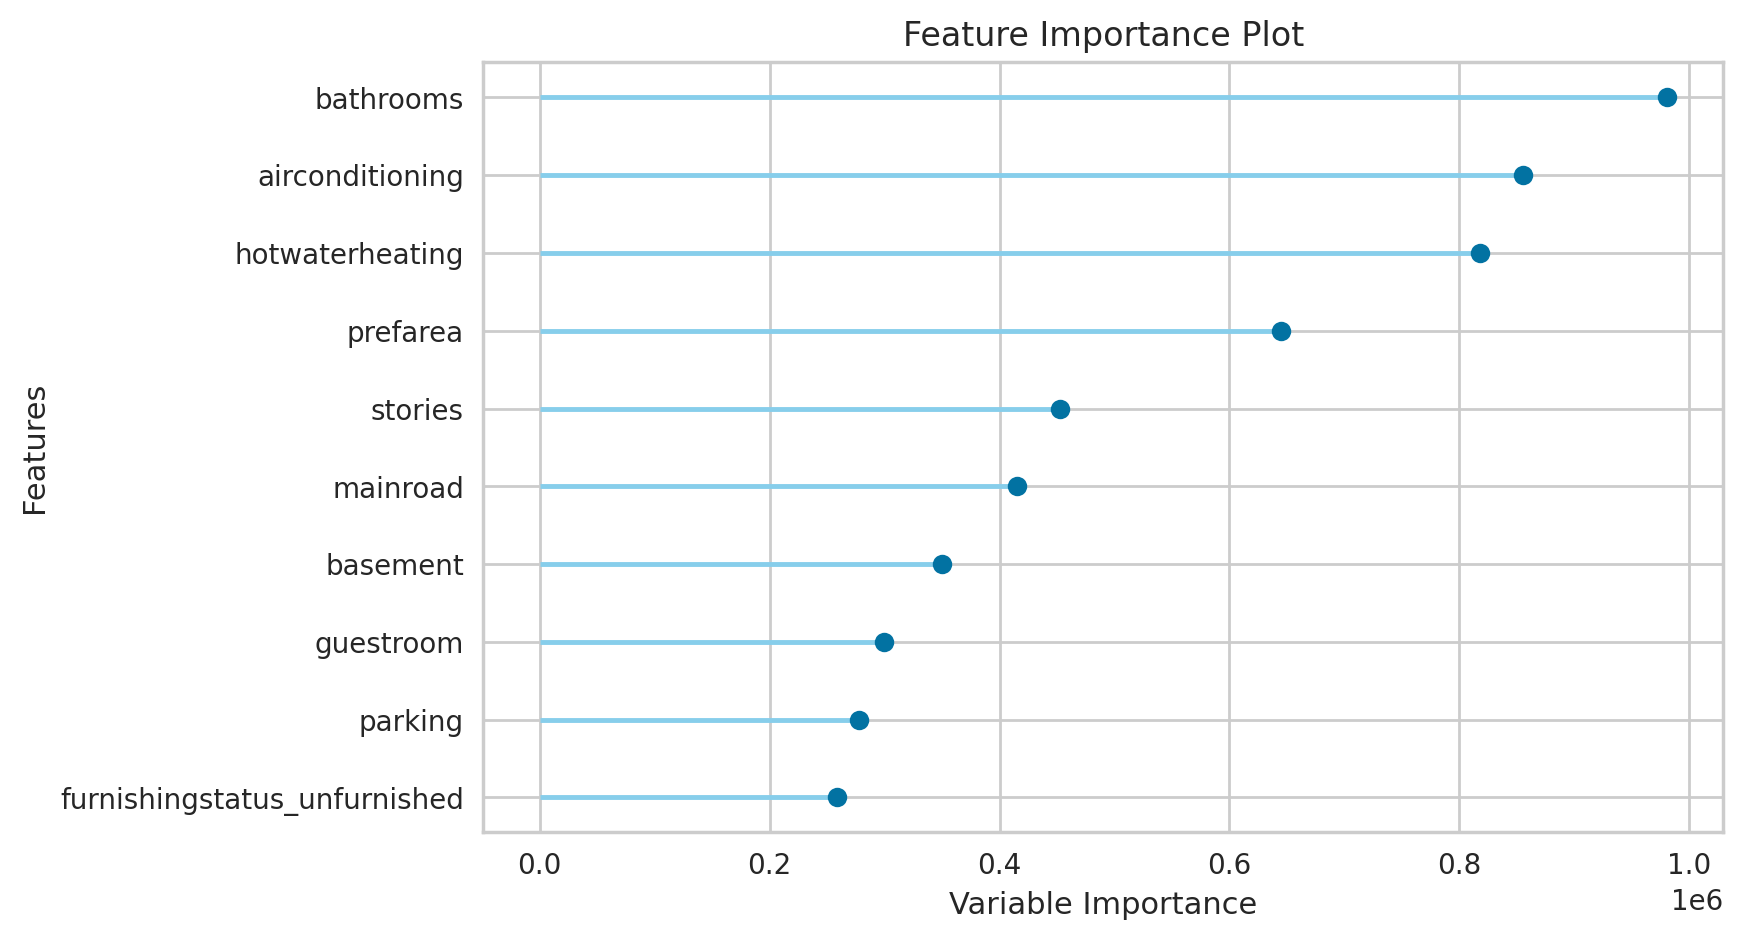

In [11]:
plot_model(finalized_model, plot='feature')

Based on the feature importance order provided, let's focus on creating visualizations for the following features in relation to predicting scores:

1. Bathrooms
2. Air Conditioning
3. Hotwater Heating
4. Prefarea
5. Stories
6. MainRoad
7. Basement
8. Guestroom
9. Parking
10. Furnishing Status

The goal is to visually explore how these features impact anime scores according to Random Forest Classifier model findings.

In [12]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=5, cols=2, subplot_titles=('Bathrooms vs Price',
                                                    'Air Conditioning vs Price',
                                                    'Hot Water Heating vs Price',
                                                    'Preferred Area vs Price',
                                                    'Stories vs Price',
                                                    'Main Road vs Price',
                                                    'Basement vs Price',
                                                    'Guestroom vs Price',
                                                    'Parking vs Price',
                                                    'Furnishing Status vs Price'),
                    vertical_spacing=0.08,
                    horizontal_spacing=0.1)

# Plot 1: Relationship between number of bathrooms and house prices
box_plot_bathrooms = go.Box(x=data['bathrooms'], y=data['price'], 
                            marker=dict(color='blue'), name='Bathrooms vs Price')

# Plot 2: Impact of air conditioning on house prices
box_plot_air_conditioning = go.Box(x=data['airconditioning'], y=data['price'], 
                                   marker=dict(color='orange'), name='Air Conditioning vs Price')

# Plot 3: Impact of hot water heating on house prices
box_plot_hot_water_heating = go.Box(x=data['hotwaterheating'], y=data['price'], 
                                    marker=dict(color='green'), name='Hot Water Heating vs Price')

# Plot 4: Impact of being in a preferred area on house prices
box_plot_pref_area = go.Box(x=data['prefarea'], y=data['price'], 
                            marker=dict(color='red'), name='Preferred Area vs Price')

# Plot 5: Relationship between number of stories and house prices
box_plot_stories = go.Box(x=data['stories'], y=data['price'], 
                          marker=dict(color='purple'), name='Stories vs Price')

# Plot 6: Impact of being on the main road on house prices
box_plot_mainroad = go.Box(x=data['mainroad'], y=data['price'], 
                           marker=dict(color='cyan'), name='Main Road vs Price')

# Plot 7: Impact of having a basement on house prices
box_plot_basement = go.Box(x=data['basement'], y=data['price'], 
                           marker=dict(color='gray'), name='Basement vs Price')

# Plot 8: Impact of having a guestroom on house prices
box_plot_guestroom = go.Box(x=data['guestroom'], y=data['price'], 
                            marker=dict(color='pink'), name='Guestroom vs Price')

# Plot 9: Impact of parking on house prices
box_plot_parking = go.Box(x=data['parking'], y=data['price'], 
                          marker=dict(color='brown'), name='Parking vs Price')

# Plot 10: Impact of furnishing status on house prices
box_plot_furnishing_status = go.Box(x=data['furnishingstatus'], y=data['price'], 
                                    marker=dict(color='yellow'), name='Furnishing Status vs Price')

# Add plots to subplots
fig.add_trace(box_plot_bathrooms, row=1, col=1)
fig.add_trace(box_plot_air_conditioning, row=1, col=2)
fig.add_trace(box_plot_hot_water_heating, row=2, col=1)
fig.add_trace(box_plot_pref_area, row=2, col=2)
fig.add_trace(box_plot_stories, row=3, col=1)
fig.add_trace(box_plot_mainroad, row=3, col=2)
fig.add_trace(box_plot_basement, row=4, col=1)
fig.add_trace(box_plot_guestroom, row=4, col=2)
fig.add_trace(box_plot_parking, row=5, col=1)
fig.add_trace(box_plot_furnishing_status, row=5, col=2)

# Update layout
fig.update_layout(height=2000, width=1200, 
                  title_text="Comprehensive Visualization of House Prices",
                  title_x=0.5,
                  showlegend=False)

# Update x-axis titles
fig.update_xaxes(title_text="Number of Bathrooms", row=1, col=1)
fig.update_xaxes(title_text="Air Conditioning", row=1, col=2)
fig.update_xaxes(title_text="Hot Water Heating", row=2, col=1)
fig.update_xaxes(title_text="Preferred Area", row=2, col=2)
fig.update_xaxes(title_text="Number of Stories", row=3, col=1)
fig.update_xaxes(title_text="Proximity to Main Road", row=3, col=2)
fig.update_xaxes(title_text="Basement", row=4, col=1)
fig.update_xaxes(title_text="Guestroom", row=4, col=2)
fig.update_xaxes(title_text="Parking", row=5, col=1)
fig.update_xaxes(title_text="Furnishing Status", row=5, col=2)

# Update y-axis title
fig.update_yaxes(title_text="Price", col=1)

# Update subplot titles font and size
fig.update_annotations(font=dict(size=20))

# Show plot
fig.show()


In [13]:
# Calculate average increase percentage for number of bathrooms
min_price_bathrooms = data.groupby('bathrooms')['price'].mean().min()
avg_price_bathrooms = data.groupby('bathrooms')['price'].mean()
avg_increase_bathrooms = ((avg_price_bathrooms / min_price_bathrooms) - 1) * 100
bathrooms_increase_dict = avg_increase_bathrooms.to_dict()
print("Average Increase Percentage for Number of Bathrooms:")
for key, value in sorted(bathrooms_increase_dict.items()):
    print(f"{key}: {value:.0f}%")

# Calculate average increase percentage for air conditioning
min_price_air_conditioning = data.groupby('airconditioning')['price'].mean().min()
avg_price_air_conditioning = data.groupby('airconditioning')['price'].mean()
avg_increase_air_conditioning = ((avg_price_air_conditioning / min_price_air_conditioning) - 1) * 100
air_conditioning_increase_dict = avg_increase_air_conditioning.to_dict()
print("\nAverage Increase Percentage for Air Conditioning:")
for key, value in sorted(air_conditioning_increase_dict.items()):
    print(f"{key}: {value:.0f}%")

# Calculate average increase percentage for hot water heating
min_price_hot_water_heating = data.groupby('hotwaterheating')['price'].mean().min()
avg_price_hot_water_heating = data.groupby('hotwaterheating')['price'].mean()
avg_increase_hot_water_heating = ((avg_price_hot_water_heating / min_price_hot_water_heating) - 1) * 100
hot_water_heating_increase_dict = avg_increase_hot_water_heating.to_dict()
print("\nAverage Increase Percentage for Hot Water Heating:")
for key, value in sorted(hot_water_heating_increase_dict.items()):
    print(f"{key}: {value:.0f}%")

# Calculate average increase percentage for preferred area
min_price_pref_area = data.groupby('prefarea')['price'].mean().min()
avg_price_pref_area = data.groupby('prefarea')['price'].mean()
avg_increase_pref_area = ((avg_price_pref_area / min_price_pref_area) - 1) * 100
pref_area_increase_dict = avg_increase_pref_area.to_dict()
print("\nAverage Increase Percentage for Preferred Area:")
for key, value in sorted(pref_area_increase_dict.items()):
    print(f"{key}: {value:.0f}%")

# Calculate average increase percentage for number of stories
min_price_stories = data.groupby('stories')['price'].mean().min()
avg_price_stories = data.groupby('stories')['price'].mean()
avg_increase_stories = ((avg_price_stories / min_price_stories) - 1) * 100
stories_increase_dict = avg_increase_stories.to_dict()
print("\nAverage Increase Percentage for Stories:")
for key, value in sorted(stories_increase_dict.items()):
    print(f"{key}: {value:.0f}%")

# Calculate average increase percentage for being on main road
min_price_mainroad = data.groupby('mainroad')['price'].mean().min()
avg_price_mainroad = data.groupby('mainroad')['price'].mean()
avg_increase_mainroad = ((avg_price_mainroad / min_price_mainroad) - 1) * 100
mainroad_increase_dict = avg_increase_mainroad.to_dict()
print("\nAverage Increase Percentage for Main Road:")
for key, value in sorted(mainroad_increase_dict.items()):
    print(f"{key}: {value:.0f}%")

# Calculate average increase percentage for having a basement
min_price_basement = data.groupby('basement')['price'].mean().min()
avg_price_basement = data.groupby('basement')['price'].mean()
avg_increase_basement = ((avg_price_basement / min_price_basement) - 1) * 100
basement_increase_dict = avg_increase_basement.to_dict()
print("\nAverage Increase Percentage for Basement:")
for key, value in sorted(basement_increase_dict.items()):
    print(f"{key}: {value:.0f}%")

# Calculate average increase percentage for having a guestroom
min_price_guestroom = data.groupby('guestroom')['price'].mean().min()
avg_price_guestroom = data.groupby('guestroom')['price'].mean()
avg_increase_guestroom = ((avg_price_guestroom / min_price_guestroom) - 1) * 100
guestroom_increase_dict = avg_increase_guestroom.to_dict()
print("\nAverage Increase Percentage for Guestroom:")
for key, value in sorted(guestroom_increase_dict.items()):
    print(f"{key}: {value:.0f}%")

# Calculate average increase percentage for parking
min_price_parking = data.groupby('parking')['price'].mean().min()
avg_price_parking = data.groupby('parking')['price'].mean()
avg_increase_parking = ((avg_price_parking / min_price_parking) - 1) * 100
parking_increase_dict = avg_increase_parking.to_dict()
print("\nAverage Increase Percentage for Parking:")
for key, value in sorted(parking_increase_dict.items()):
    print(f"{key}: {value:.0f}%")

# Calculate average increase percentage for furnishing status
min_price_furnishing_status = data.groupby('furnishingstatus')['price'].mean().min()
avg_price_furnishing_status = data.groupby('furnishingstatus')['price'].mean()
avg_increase_furnishing_status = ((avg_price_furnishing_status / min_price_furnishing_status) - 1) * 100
furnishing_status_increase_dict = avg_increase_furnishing_status.to_dict()
print("\nAverage Increase Percentage for Furnishing Status:")
for key, value in sorted(furnishing_status_increase_dict.items()):
    print(f"{key}: {value:.0f}%")

Average Increase Percentage for Number of Bathrooms:
1: 0%
2: 48%
3: 73%
4: 191%

Average Increase Percentage for Air Conditioning:
no: 0%
yes: 43%

Average Increase Percentage for Hot Water Heating:
no: 0%
yes: 18%

Average Increase Percentage for Preferred Area:
no: 0%
yes: 33%

Average Increase Percentage for Stories:
1: 0%
2: 14%
3: 36%
4: 73%

Average Increase Percentage for Main Road:
no: 0%
yes: 47%

Average Increase Percentage for Basement:
no: 0%
yes: 16%

Average Increase Percentage for Guestroom:
no: 0%
yes: 27%

Average Increase Percentage for Parking:
0: 0%
1: 25%
2: 43%
3: 42%

Average Increase Percentage for Furnishing Status:
furnished: 37%
semi-furnished: 22%
unfurnished: 0%


<a id="final-findings"></a>

# <div style="font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #1976D2; font-size: 150%; text-align: center; padding: 10px; background: #BBDEFB; border-bottom: 8px solid #0D47A1;">Final Findings 📊✨</div>

After evaluating the dataset and making predictions, the following conclusions were drawn:

## <div style="margin-bottom: -30px; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 2px; color: #1976D2; font-size: 100%;">Number of Bathrooms:</div>
- <div style="font-size: 115%;">Houses with more bathrooms experience a substantial price increase.</div>
- <div style="font-size: 115%;">A 4-bathroom house sees a remarkable 191% increase compared to a 1-bathroom house.</div>

## <div style="margin-bottom: -30px; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 2px; color: #1976D2; font-size: 90%;">Air Conditioning:</div>
- <div style="font-size: 115%;">Properties with air conditioning systems witness a noticeable 43% increase in average price.</div>

## <div style="margin-bottom: -30px; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 2px; color: #1976D2; font-size: 100%;">Hot Water Heating:</div>
- <div style="font-size: 115%;">Houses with hot water heating show an 18% increase in average price. </div>

## <div style="margin-bottom: -30px; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 2px; color: #1976D2; font-size: 90%;">Preferred Area:</div>
- <div style="font-size: 115%;">Properties in preferred areas enjoy a significant 33% increase in average price.</div>

## <div style="margin-bottom: -30px; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 2px; color: #1976D2; font-size: 90%;">Number of Stories:</div>
- <div style="font-size: 115%;">A 4-story house commands a substantial 73% increase compared to a single-story house.
</div>

## <div style="margin-bottom: -30px; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 2px; color: #1976D2; font-size: 90%;">Proximity to Main Road:</div>
- <div style="font-size: 115%;">Houses located on main roads see a 47% increase in average price. </div>

## <div style="margin-bottom: -30px; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 2px; color: #1976D2; font-size: 90%;">Basement and Guestroom:</div>
- <div style="font-size: 115%;">Having a basement corresponds to a 16% increase, while a guestroom leads to a 27% increase in average price.</div>

## <div style="margin-bottom: -30px; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 2px; color: #1976D2; font-size: 90%;">Parking:</div>
- <div style="font-size: 115%;">Houses with parking spaces witness significant increases, with a 3-parking space property seeing a 42% increase compared to none.</div>

## <div style="margin-bottom: -30px; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 2px; color: #1976D2; font-size: 90%;">Furnishing Status:</div>
- <div style="font-size: 115%;">Furnished properties command the highest increase, with a 37% rise in average price, followed by semi-furnished properties with a 22% increase compared to unfinsished properties </div>

<div style="background-color: #E3F2FD; padding: 10px;">
    <p style="font-size: 150%; color: #1976D2; font-weight: bold;"> Thank you for taking the time to explore this notebook! I hope you found the insights valuable and the visualizations engaging. If you have any questions, feedback, or suggestions for improvement, feel free to reach out. Happy coding! 😊</p>
</div>